In [2]:
import yahoo
import pandas as pd

In [20]:
puts = pd.read_csv('outputs/puts_output.csv')
calls = pd.read_csv('outputs/calls_output.csv')

#data = pd.concat([puts, calls])
data = calls
data['SD/MA'] = data['STD']/data['MA']
data['% MA to adj'] = ((data['adjclose']/data['MA'])-1).apply(lambda x: abs(x))
data['% ADJ to Strike'] = ((data['Strike']/data['adjclose'])-1).apply(lambda x: abs(x))
data[['SD/MA','% MA to adj','% ADJ to Strike', 'Return']]

,SD/MA,% MA to adj,% ADJ to Strike,Return
0,0.026488,0.051144,0.141950,0.002857
1,0.030464,0.029739,0.140093,0.001429
2,0.030584,0.015897,0.055807,0.012143
3,0.045615,0.008045,0.104184,0.007143
4,0.027116,0.076609,0.146601,0.010714
...,...,...,...,...
174,0.054372,0.172531,0.152953,0.238000
175,0.177233,0.304928,0.061008,0.127500
176,0.153487,0.089771,0.286174,0.017500
177,0.166065,0.315954,0.049869,0.017500


In [21]:
#calls first
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(data[['SD/MA','% MA to adj','% ADJ to Strike', 'Return']], data['Assigned'], test_size=0.15, random_state=42)


In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
def plot_metric(clf, testX, testY, name):
    """
    Small function to confusion matrix
    """
    plt.style.use('ggplot')
    plot_confusion_matrix(clf, testX, testY, normalize='true')
    plt.title(f"Confusion Matrix [{name}]")

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(trainX, trainY)
print(f"Validation Accuracy of Random Forest Classifier is: {(rf_classifier.score(validX, validY))*100:.2f}%")

Validation Accuracy of Random Forest Classifier is: 88.89%


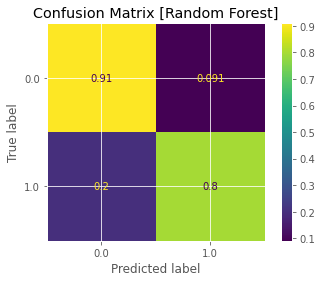

In [24]:
plot_metric(rf_classifier, validX, validY, "Random Forest")

In [12]:
rf_classifier.feature_importances_

array([0.2059461 , 0.20710533, 0.29722361, 0.28972496])

In [13]:
import numpy as np
sample_test = np.array([0.583691767213275/11.7247619174776, (11.0799999237061/11.7247619174776)-1, (10.5/11.0799999237061)-1,.01])
#sample_test.reshape(1,-1)

In [14]:
rf_classifier.predict(sample_test.reshape(1,-1))

array([0.])

In [15]:
rf_classifier.predict(validX)

array([0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0.])

In [16]:
validY.values

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0.])

In [17]:
rf_classifier.predict(validX) == validY.values

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [18]:
(validY.values == 1) == (rf_classifier.predict(validX) != validY.values)

array([ True, False, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True])

In [19]:
validX['Return']

30     0.015714
143    0.041379
170    0.038462
73     0.020000
159   -0.150000
252    0.015714
190    0.013333
104    0.025000
9      0.010400
186    0.020000
24     0.015152
109    0.094400
96     0.010909
205    0.019048
239    0.016800
136    0.040000
77     0.000163
6      0.010714
208    0.021905
180    0.008333
45     0.012178
120    0.032222
19     0.023077
60     0.013824
259    0.014091
139    0.025000
224    0.049091
46     0.014400
158    0.070000
15     0.010000
237    0.020444
229    0.022308
177    0.020000
33     0.007500
132    0.028889
126    0.060000
173    0.006154
10     0.023333
114    0.020000
97     0.017727
Name: Return, dtype: float64